## Problem statement for rental price prediction

As part of the drive to serve the needs of clients better, Lidl Travel has diversified its services to include beach trips, round trips, self-arrivals, cruises among other holiday events. This requires that memorable vacations of customers are meant with good holiday offers the meets their best interest and rentals remains one of such areas where greater value for money can be pursued. Among others, the travel agent consultant is faced with the challenge of knowing the price beforehand in order to provide better services to clients. 

To tackle this problem, there is the need to understand how various factors, descriptive of type of room and neighbourhood where it is located among others influence and more importantly can be leverage to predict rental prices. The absence of an inteligent tool and mechanism that enables Lidl Travel product managers and travel agents to leverage available data to predict rental prices remains a business problem that is to be addressed by Lidl Digital Data Science team.


Informed by this, this task aims to predict rental prices. Thus, rental price is the target variable and other features such as the room type, neighbourhood among others are the predictor variables. 
In order to translate this understanding into a technical solution that can be communicated to non-technical 
audience later, there is the need to capture the prevailing challenge as a snapshot with a problem design framework. 


The Situation Complication Question (SCQ) framework is employed for that purpose. A key element is identifying the stakeholder and end-user of the solution to be provided. This will require some level of insider information about the various stakeholders who have identified rental price prediction as their pain-point. 


Hypothetically, the stakeholder is defined to be the product team for Lidl Travel including the a travel agent with support 
from Lidl Digital data science team in providing an intelligent tool for price prediction.

Lidl Travel when provided with an intelligent solution and tool for predicting rental prices will be able to plan trips to better accommodate rental prices as well as spot good rental offers on the market when they see one. By this, a good model that is capable of predicting current prices precisely can be assummed to do so in the future and when current market price for a rental is significantly below its prediction, Lidl Travel will be properly informed that it is a good offer hence make the best decision of booking it for a client. This among others are expected values to be delivered by this project.


The SCQ is depicted below;

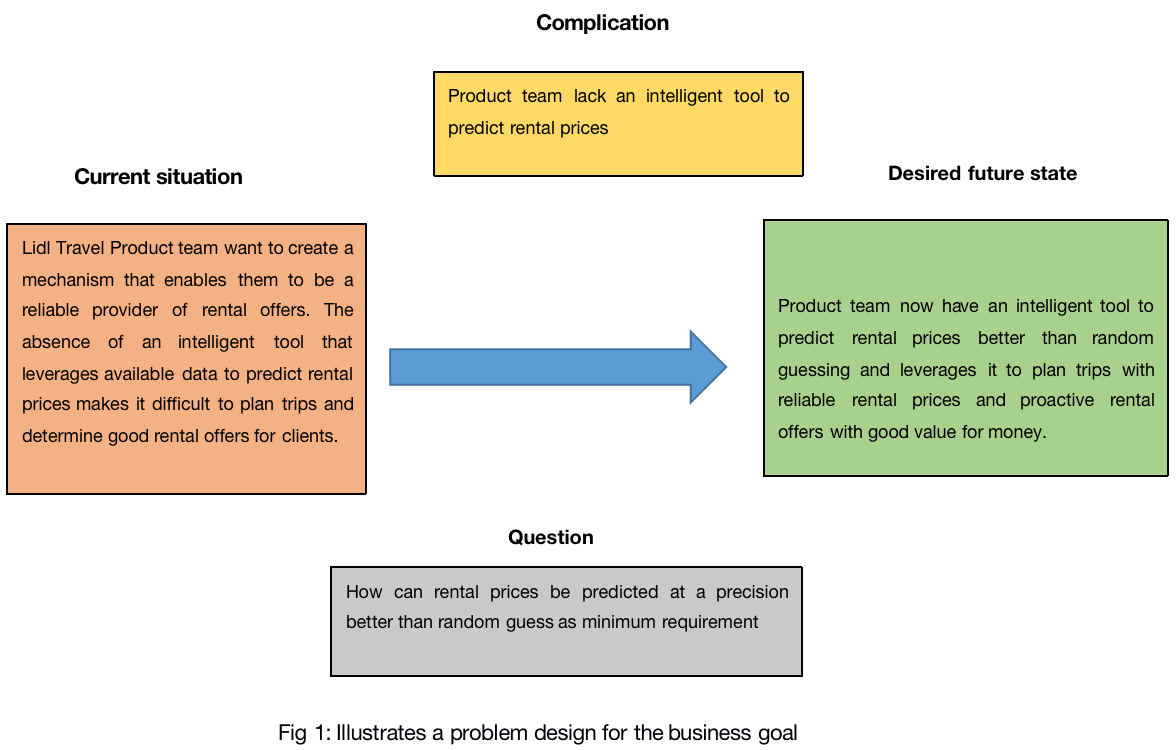

The main focus of a data science task defines its goals, category of algorithm to choose, which objective function to 
optimize, evaluation metric to choose and questions to address hence identified here. 

This task focuses on achieving good accuracy and precision for predicting rental prices rather than intrepretability of model. This influences how the research questions and objectives are designed.



## Research Questions

(I) How do we leverage available data to develop a rental price prediction model with an accuracy better than random guessing? 

(II) How does features such as outliers impact the model

(III) Which techniques can be used to identify and address outliers

Worthy of notice is that, not only does this question reflect the focus on model precision but also techniques employed within the context of limited resouces such as computational power and time alloted for the task.


## Research Objectives

(I) To develop a model that predicts rental prices with an accuracy better than the benchmark baseline model of random guessing

(II) To demonstrate the impact of outliers on the model performance

(III) To illustrates techniques of identifying and addressing outliers and how they affect the model performance


### Expected Results

A machine learning model that predicts rental price is expected to be discussed in this report.

In developing the machine learning model, the end goal which is prediction accuracy and precision influenced the 
end-product of the modelling process. This assertion informed the methodology and techniques employed. 

With the problem statement and user requirement identified, the whole modeling process 
can be defined to include data exploration and preparation, model development, hyperparameters tuning and evaluation, packaging 
and deployment into production environment. For this task, focus is mainly on detailing data exploration and preparation, modeling and evaluation. To reflect the research questions and objectives, a data-centric approach is adopted for this task. By this, much time is spent on exploring features of the data to suggest relevant and appropriate variables to include in the model as well as techniques to improve the model rather than focusing on experimenting with all models possible to improve performance. On the background of data-centric approach, filter-based feature selection method was employing to suggest appropriate features for modelling as part of the explortory analysis.

Given the time constrain for the exercise, suggestions on improving the results are provided rather than exhaustive implementation of all possible techniques. 



### Identifying variables in the data

In developing an algorithm for prediction, identifying the variables to use and how to categorize them is important. This determines the type of visualization, statistical test and algorithms to employ.
The following were deduced;

#### Target / Outcome variable

price: continuous quantitative variable

#### All feature variables in the dataset (without selection) and their data type

• id: Discrete quantitative variable

• host_id: Discrete quantitative variable

• neighbourhood_group: Categorical 

• neighbourhood: Categorical

• room_type: Categorical 

• minimum_nights: Discrete quantitative variable

• number_of_reviews: Discrete quantitative variable

• last_review: Discrete quantitative variable / could also designated as ordinal

• reviews_per_month: Continuous quantitative variable

• calculated_host_listings_count: Discrete quantitative variable

• availability_365: Discrete quantitative variable


Exploratory analysis and visualization techniques are data type dependent as it influences the transformation techniques to employ hence the need to identify the type of variables. The exploratory analysis is organized to reflect that.

## Exploratory analysis 

An important aspect of modeling is the data scientist's domain knowledge to complement
the statistical analysis and machine learning algorithms to be applied. This underlined some of the 
logic and decisions in key aspects of the analysis such as feature selection, feature engineering and 
data transformation among others. A highlight of what informed such exploratory analysis is provided as follows.


In selecting features to be included as predictors in the model, the relevance of the feature in terms of 
likelihood of providing actionable insights and predictive signals were considered. 

On this basis, id as a variable was not included in the model because it is deduced to more of an an identifier for each rental but does not provide any information about the rental that allows rental prices to be predicted. The same can be said of host_id though they may describe some characteristics of the rental given that not all rentals have a unique host_id. Nonetheless, host_id is of high cardinality, so much so that, reducing the cardinality will not help much hence also excluded from the model.


Guided by domain knowledge, it is deduced that "neighbourhold" and "neighbourhood_group" are likely to have an impact on rental prices as rental prices will be higher in certain neighbourhoods than others due to the fact that neighbourhoods usually differ based on infrastructure and connectivity among others which influence prices.


An equally important feature that follows this intuition is "room_type". This predictor is likely to offer predictive signals for rental price given that one can expect "Shared room" as a room type to command a lower price compared to "Entire home/apt" with all other things being equal. "Minimum_nights" could play into pricing strategy of landlords or rental owners as lower minimum night means rental prices have to be set high in order to accrue enough or relatively high total rental income per transaction while with a higher minimum night, price can be set to be relatively lower in order to make it cheaper and yet accrue enough or relatively high total rental income. These deductions suggest that minimum nights is likely to be a good predictor hence explored for modelling.


While these assertions offer some guide as to variables that can be outrightly excluded from the model, the selection of many others need to be assess through exploratory analysis. Moreover, deviations from the normal is an expected challenge and characteristics usually recorded by data hence the need to subject the suggestions made 
to statistical test to verify and confirm feature selection. This commences with exploratory analysis as follows.

In [ ]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import (ggplot, ggtitle, aes, geom_col, theme_dark, 
                      theme_light, scale_x_discrete,
                      position_dodge, geom_text, element_text, theme,
                      geom_histogram, geom_bar, xlab, ylab, scale_y_log10, scale_x_log10,
                      geom_point, geom_smooth, geom_boxplot, coord_flip
                    )
import scipy.stats as stats
import pingouin as pg
import numpy as np
import ast
from bioinfokit.analys import stat as infostat
import seaborn as sns

import numpy as np
from scipy.stats import iqr
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import (train_test_split, 
                                     RandomizedSearchCV,
                                     cross_validate
                                     )
from argparse import Namespace
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error 
from sklearn.compose import ColumnTransformer


#### Data analysis

This data analysis is undertaken using pandas and scipy among others. First, the data is imported and descriptive statistics is undertaken. The implementation is as follows;

In [ ]:
df = pd.read_csv('holiday_rental.csv')



In [ ]:
# provide info on data types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(1), int64(7), object(

A key insight gained from this is the presence of missing data for last_review and reviews_per_month
hence have to be handle as part of the data preparation process.

The decision on how to handle missing data is equally influence by the percentage of data that is missing given that imputing a high percentage of missing data introduces a high amount of "artificial data" that can change the actual underlying distribution of the phenomenon being studied. The percentage of data missing for each variable is computed as follows.



In [ ]:
# Total missing data as a percentage of all data points is estimated as follows
def get_missing_data_percent(data: pd.DataFrame, variable: str):
    total_missing = data[variable].isnull().sum()
    total_data = data.shape[0]
    percent_missing = (total_missing / total_data) * 100
    print(f'Percentage of data missing in {variable}: {round(percent_missing, 2)}%')

## implement function for percentage of missing data per variable
for variable_name in df.columns:
    get_missing_data_percent(data=df, variable=variable_name)
    


Percentage of missing in id: 0.0%
Percentage of missing in host_id: 0.0%
Percentage of missing in neighbourhood_group: 0.0%
Percentage of missing in neighbourhood: 0.0%
Percentage of missing in room_type: 0.0%
Percentage of missing in price: 0.0%
Percentage of missing in minimum_nights: 0.0%
Percentage of missing in number_of_reviews: 0.0%
Percentage of missing in last_review: 20.56%
Percentage of missing in reviews_per_month: 20.56%
Percentage of missing in calculated_host_listings_count: 0.0%
Percentage of missing in availability_365: 0.0%


From the analysis of missing data, two variables have 20.56% of data missing. This is quite a high percentage of missing data to impute even though only a few features are facing this challenge. Appropriate method will be decided on handling and imputing missing data after further exploratory analysis.

###   Descriptive statistics 

Most descriptive statistics such as mean, minimum, maximum among others, highlight the range and 
distribution of variables that are quantitative. Hence quantitative variables are selected for this 
type of analysis as follows.








In [ ]:
df[['minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count',
    'availability_365', 'price']].describe()

minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365         price  
count                    48895.000000      48895.000000  48895.000000  
mean                         7.143982        112.781327    152.720687  
std                         32.952519        131.622289    240.154170  
min                          1.000000          0.000000      0.000000  
25%                          1.000000          0.000000     69.000000  
50%                          1.000000         45.000000    106.000000  
75%                          2.000000        227.000000    175.000000  
max                        327.000000        365.000000  10000.000000

From the analysis, it is deduced that outliers are likely to be present in almost every variable. For instance,

minimum_nights has a high difference between the 75% percentile (5) and the maximum (1250). The 
same can be said about price with 75% percentile being 175 and maximum being 10000. Another issue of concern is the fact that minimum price is 0 when even the least of minimum_nights is 1. This raises questions about the recording of the data or price variable hence the need to discuss with the team, check metadata or data source about how the data was collected to verify such unexpected instances. A rental price of 0 suggests that the room is on offer for free which is realistically unlikely. "availability_365" is the only predictor that seems not to be likely influenced by outliers. Detection and treatment of outliers will be undertaken in the latter sections.

## Data visualization to ascertain certain assumptions required by some models

Various plots are used to visualize certain characteristics of the data to ascertain if certain assumptions are met for some models to be used. Generally, parametric models like linear regression requires data to be 
normally distributed and a linear relationship to exist between the predictors 
and target variable.


To investigate this, histogram was used to visualize the distribution of data for 
continuous variables. This is implemented below.









In [ ]:
def plot_histogram(data: pd.DataFrame, variable_to_plot: str, 
                   title: str = None, bins_method: str = 'freedman-Diaconis'
                   ):
    data = data.dropna(subset=variable_to_plot).copy()
    
    # by default Freedman–Diaconis rule is computed to determine 
    #optimal number of bins for histogram
    
    if bins_method == 'freedman-Diaconis':
        h = (2 * iqr(np.array(data[variable_to_plot].dropna().values))) 
                / (len(data[variable_to_plot])
              **(1/3)
            )

        nbins = (data[variable_to_plot].max() - data[variable_to_plot].min()) / h
        nbins = round(nbins, 1)
    else:
        nbins = 5
        
    if title is None:
        title = f"Distribution of {variable_to_plot}"
    histogram = (ggplot(data, aes(x=variable_to_plot))
                + geom_histogram(bins=nbins)
                + ggtitle(title) 
            )
    return print(histogram)


#### Visualize target variable

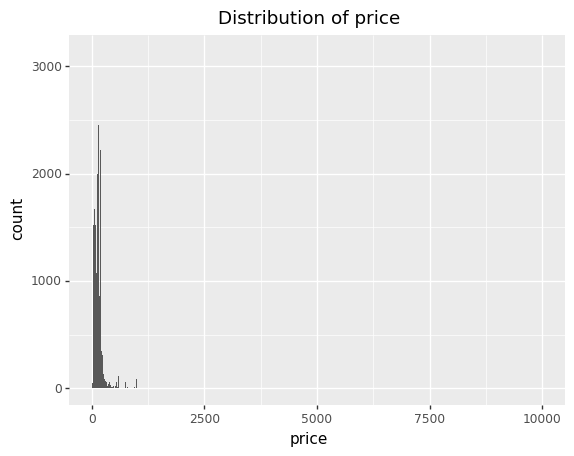

In [ ]:
# Plot of target variable

plot_histogram(data=df, variable_to_plot='price')

The plot shows that the distribution of price is right skewed. 


For large value ranges, 
using logarithmic scale to visualize usually improve the legibility of the graph but in this 
case it also lead to distortion of the actual distribution shape hence not used.


### Visualize quantitative predictor variables

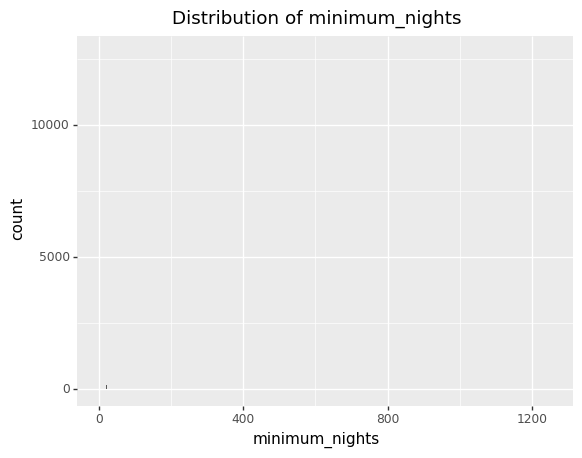

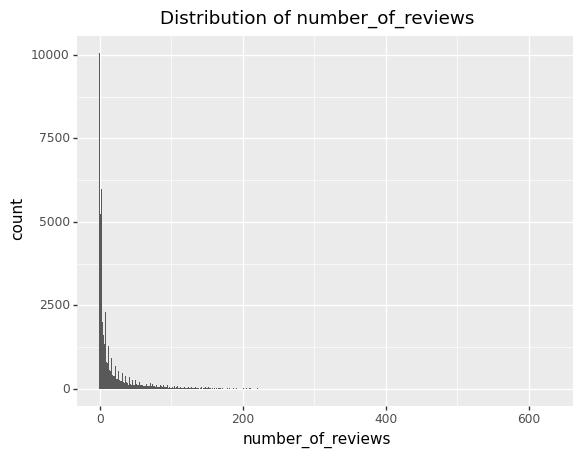

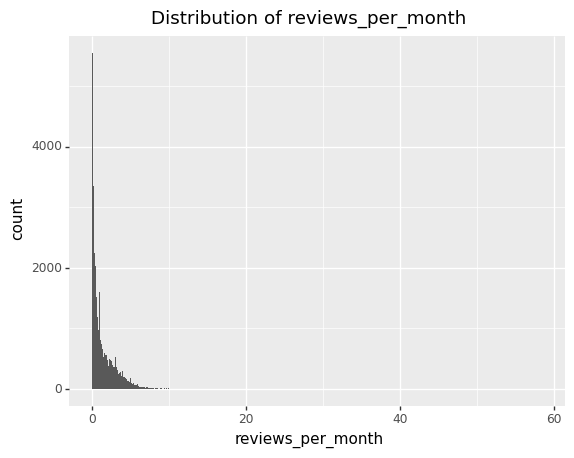

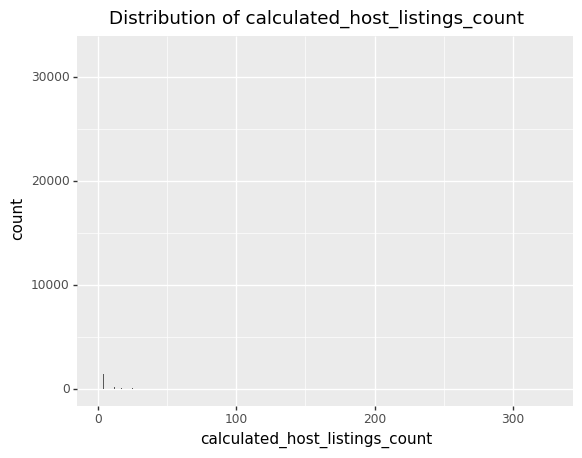

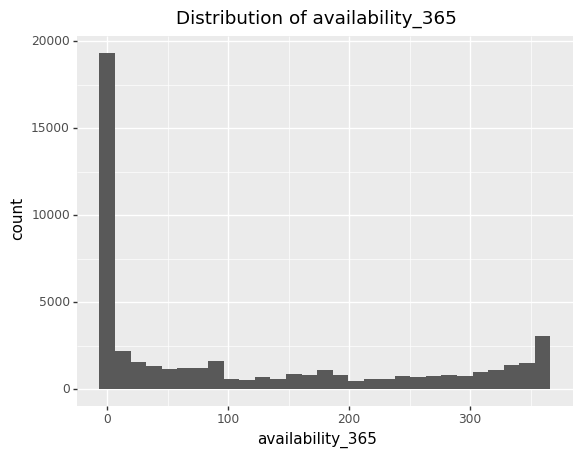

In [ ]:
# plot of quantitative predictor variables

quant_predictor_var = ['minimum_nights', 'number_of_reviews', 
                       'reviews_per_month', 'calculated_host_listings_count',
                       'availability_365'
                       ]


for var in quant_predictor_var:
    plot_histogram(data=df, variable_to_plot=var)

From the histogram, it is clear that number_of_reviews and reviews_per_month are right skewed.

### Visualizing the relationship between target variable and quantitative predictors

A more important visualization is one that offers insight on the relationship 
between target variable and predictors. In pursuit of investigating whether or not 
a linear relationship between 
target variable and predictor variables exists, a scatterplot is used to visualize 
them. Scatterplot is more appropriate for quantitative variables. 
Thus, all the quantitative predictor variables are plotted against rental price as the target variable on 
the y-axis. This is implemented below.












In [ ]:
def plot_scatterplot(data: pd.DataFrame,
                      x_colname: str,
                      y_colname: str = 'hits'
                      ):
    """ Scatterplot to visualize relationship between two variables. 
    Args:
        data (pd.DataFrame): Data which contains variables to plot
        
        y_colname (str): column name (variable) to plot on y-axis
        x_colname (str): column name (variable) to plot on x-axis
    """
    scatter_graph = (ggplot(data=data, mapping=aes(y=y_colname, x=x_colname)) 
                            + geom_point() + geom_smooth(method='lm')
                            + ggtitle(f'Scatter plot to visualize relationship between {y_colname} and {x_colname}')
                    )
    print(scatter_graph)

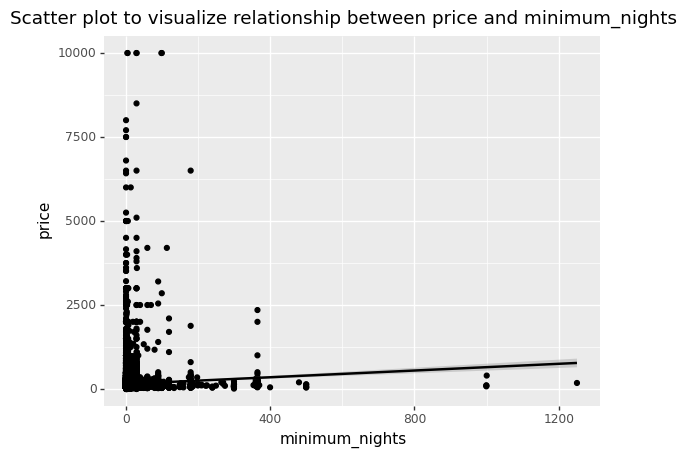

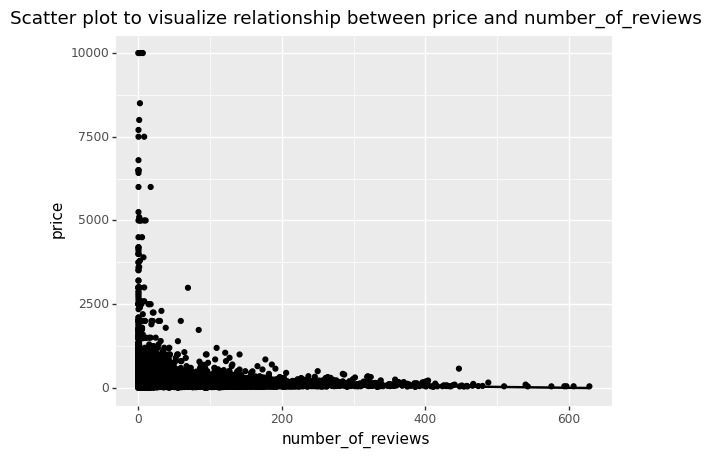

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 10052 rows containing missing values.


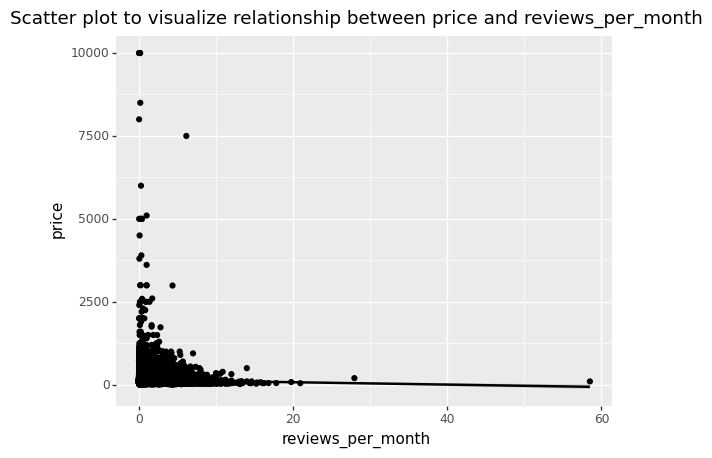

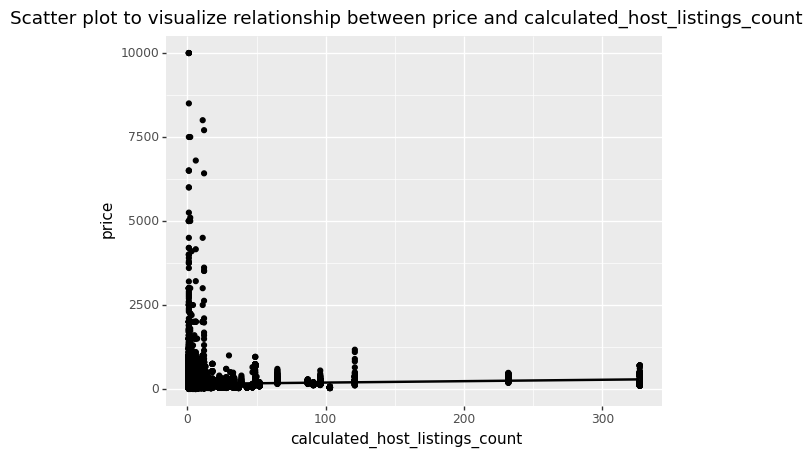

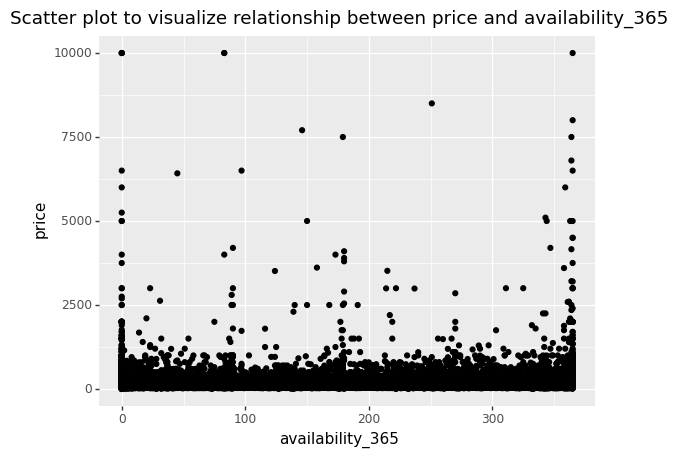

In [ ]:
for var in quant_predictor_var:
    plot_scatterplot(data=df, x_colname=var, y_colname='price')




In order to determine the right method to estimate the strength of relationship between variables,
scatterplot is used to visualize whether or not the variables are linearly related. Parametric 
method such as Pearson's correlation requires linear relationship, homoscedascticity and variables to be continuous. In an instance where one of the variables is discrete ordinal or one of the 
identified assumption is violated then non-parametric methods such as Spearman rho correlation is used.
From the scatterplot visualization done earlier, a clear linear relationship was not discernible hence Spearman correlation is used.
Pearson correlation was also used analyzed and the results compared. The implementation is provided below.



The scatter plot shows the relationship between price and other quantitative predictors. The strength of this relationship is not clear but can be determined using statistical methods after visualization as part of feature selection procedure.


### Visualization of categorical predictors

Before visualizing the categorical variables, it is worth noting that such visualizations 
are usually more insightful
and appropriate when the categorical variable is of a low cardinality. By this, predictors with
high cardinality are first identified and visualization is done on low cardinal predictors. 
The decision of preprocessing predictors with high cardinality will weighed and done when there is tangible reason to include such predictors in the model.


Checking for high cardinality is implemented as follows.




In [ ]:
categorical_vars = ['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type']

def get_number_of_unique_values(data: pd.DataFrame, variable: str):
    num_values = data[variable].nunique()
    print(f'{variable} has {num_values} unique values')
    
    

for cat_var in categorical_vars:
    get_number_of_unique_values(data=df, variable=cat_var)   


 

id has 48895 unique values
host_id has 37457 unique values
neighbourhood_group has 5 unique values
neighbourhood has 221 unique values
room_type has 3 unique values


From the analysis, "id", "host_id" and "neighbourhood" have unique values more than 100 hence are considered 
to be of high cardinality. "neighbourhood_group" and "room_type" have 5 and 3 unique values respectively hence considered to be of relatively low cardinality.

Given that id and host_id have been considered to be identifiers rather than predictors, they are not considered for preprocessing of high cardinality predictors. 

"neighbourhood_group" and "neighbourhood" appear to be sharing similar information for prediction. It can be argued that instead of recategorizing "neighbourhood" to reduce cardinality, using "neighbourhood_group" is enough and arguably a recategorization of "neighbourhood". Hence the only categorical predictors selected for visualization and statistical test are "neighbourhood_group" and "room_type".    


In order to visualize the influence of categorical predictor variables on the target variable, 
bar chart is used to depict how price is distributed among the various categories of "neighbourhood_group".





### Visualizing rental price among "neighbourhood_group"

In [ ]:
# barplot 
def barplot(data_to_plot: pd.DataFrame, 
            variable_to_plot: str, 
            title: str,
            ylabel: str, y_colname: str = None
            ):
    if y_colname is None:
        bar_graph = (ggplot(data=data_to_plot, mapping=aes(x=variable_to_plot, 
                                                fill=variable_to_plot
                                            )
                                )
                                + geom_bar()  
                                + ggtitle(title) + xlab(variable_to_plot)
                                + ylab(ylabel)
                        )

        return print(bar_graph)
    else:
        bar_graph = (ggplot(data=data_to_plot, 
                            mapping=aes(x=variable_to_plot, 
                                        y=y_colname,
                                        fill=variable_to_plot
                                        )
                                )
                                + geom_col()
                                + ggtitle(title) + xlab(variable_to_plot)
                                + ylab(ylabel)
                        )

        return print(bar_graph)


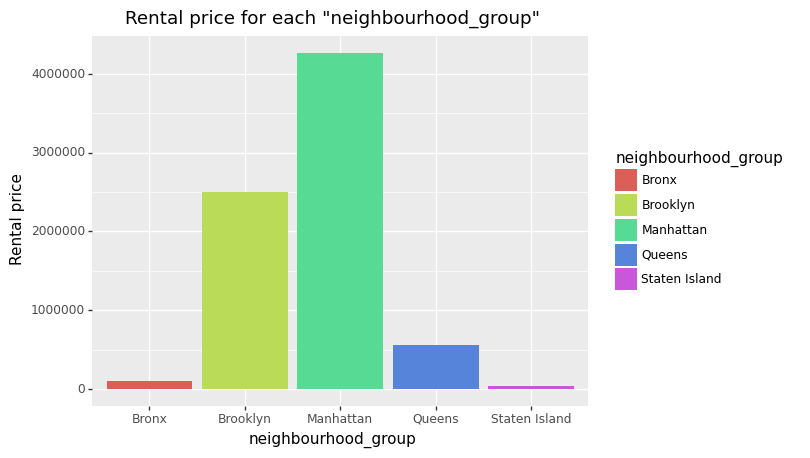

In [ ]:
# Implementation of barplot for "neighbourhood_group" 

barplot(data_to_plot=df, variable_to_plot="neighbourhood_group", 
        title='Rental price for each "neighbourhood_group"',
        ylabel='Rental price', y_colname='price'
        )

The difference in total price between various neighbourhood_group is discernible hence it is possible that 
"neighbourhood_group" has an influence on rental price hence likely to offer adequate signal for prediction of price. While this graphical illustration is an important visual aid in feature selection, a statistical test will offer a more quantitative and objective measure to determine whether to select this feature for inclusion in the model. Thus, statistical test to verify will be undertaken.

### Visualizing rental price based on room type

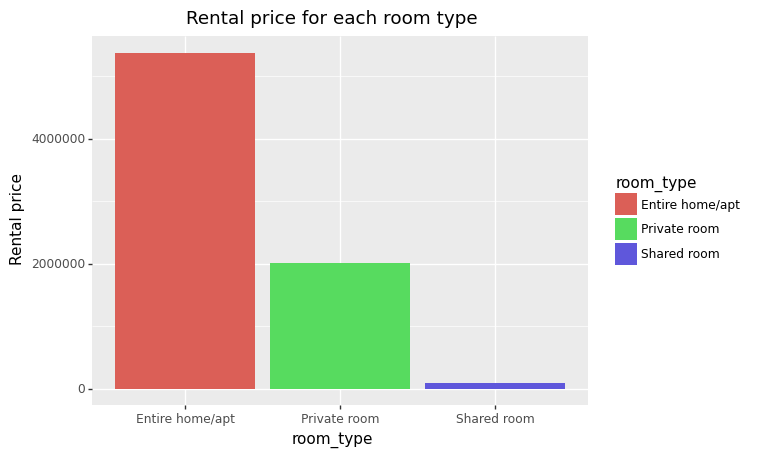

In [ ]:
# Implementation of barplot for "room_type" 

barplot(data_to_plot=df, variable_to_plot="room_type", 
        title='Rental price for each room type',
        ylabel='Rental price', y_colname='price'
        )

The graph shows a clear discernible difference in rental price between different room types which 
suggests that room type is an influencial factor on rental price hence likely to be predictive of it. 
This deduction requires statistical test to determine whether room type should be selected for predicting rental price.

## Feature selection

A key element of exploratory analysis is to gain insights that enable selection of only relevant predictors 
that actually contribute to and improve the model. Filter-based selection methods were used for the feature 
selection exercise based on statistical analysis that provides hints on the relationship between predictors 
and the target variable. The type of statistical analysis used for the feature selection as hinted earlier is determined by the data type of the predictor. 

Thus, feature selection is implemented as follows;


#### Feature selection for categorical features 

To select relevant categorical features, hypothesis is tested to determine whether there is a significant difference in rental price between the classes of a categorical variable. A significant difference suggests that the variable is a significant predictor of rental price hence have an influence that will improve the model. Univariate statistical methods are used to determine that.



#### Feature selection: Is neighbourhood group a relevant predictor of rental price 

A factor that is considered in determining whether a categorical variable such as neighbourhood group is a relevant predictor is the determination of variance of rental price between the various categories of neighbourhood group. By this, when 
rental price significantly varies between the various neighbourhood groups, it is likely to be a statistically significant predictor of rental price. 


In determining which statistical test to use, the assumptions required were tested to determine whether a parametric or non-parametric method of statistical test was appropriate. 
A parametric method such as Student t-test requires the data to be normally distributed and variance to be homogeneous for the various categories present in the predictor. 
When these assumptions are not captured by the data then a non-parametric method is appropriately used.


Both visualization and statistical methods are used to verify these assumptions. For a categorical variable, Boxplot is a good graphical technique to visulaize how rental price varies within the various neighbourhood groups.
This is then supplemented with a levene test and bartlett test to statistically verify that variance depicted by boxplot is indeed homogeneous. Barlett and levene method determines whether groups have homogeneous variance and levene is non-parametric method. 


The discussion is implemented in code as follows.




In [ ]:
def boxplot(data_to_plot: pd.DataFrame, x_colname: str, 
            y_colname: str,
            title: str = None
            ):
    if title is None:
        title = f'Distribution of {y_colname} among various {x_colname}'
        
    box_graph = (ggplot(data=data_to_plot, 
                        mapping=aes(x=x_colname, y=y_colname)
                        )
                    + geom_boxplot()
                    + coord_flip()
                    + ggtitle(title)
                )
    # the returned ggplot is printed to draw the graph which is not 
    # the case by default  when not printed
    return print(box_graph)
    

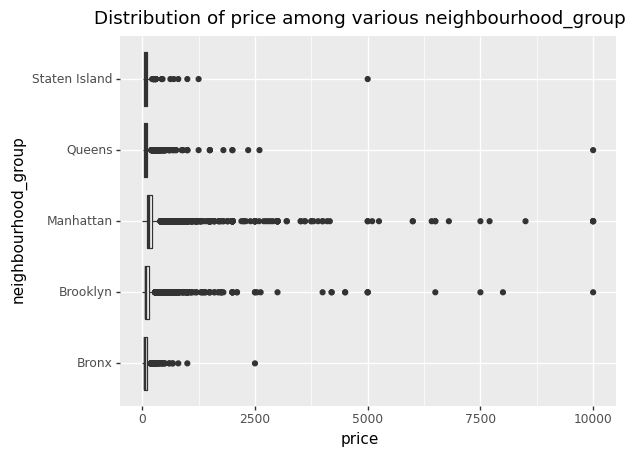

In [ ]:
# implement boxplot 
boxplot(data_to_plot=df, x_colname='neighbourhood_group', y_colname='price')

From the boxplot of rental price distribution among neighbourhood groups, there appears to be difference in how 
rental price varies among the various neighbourhood groups and some data points are arguably outliers. 
A statistical test is undertaken to determine if rental price in homogenous among the 
varous groups. Such a statistical test is premised on a hypothesis which is framed as 
follows: 


Null Hypothesis (H0): There is no statistically significant difference in variance of rental price among categories of predictor (neighbourhood groups)

Alternative Hypothesis (H1): There is statistically significant difference in variance of rental price among categories of predictor (neighbourhood groups)

For all hypothesis test of homogeneity, this framework is assummed for each categorical predictor.

Both Levene test and Bartlett test are used to check homogeneity and implemented as follows:


In [ ]:
# test of homogeneity of variance
def test_homogeneity(data: pd.DataFrame, target_var: str, predictor_var: str):
    infostat_test = infostat()
    sig_level = f'at 5% significance level'
    infostat_test.bartlett(df=data, res_var=target_var, xfac_var=predictor_var)
    bartlett_summary = infostat_test.bartlett_summary
    bartlett_pval = bartlett_summary[bartlett_summary['Parameter'] == 'p value']['Value'].item()
    
    if bartlett_pval <= 0.05:
        bart_res = 'reject Null hypothesis of equal variance'
    else:
        bart_res = 'fail to reject Null hypothesis of equal variance'
        
    bartlett_interprete = f'With a p-value of {bartlett_pval} the bartlett test suggests to: {bart_res} {sig_level}'
    
    infostat_test.levene(df=data, res_var=target_var, xfac_var=predictor_var)
    levene_summary = infostat_test.levene_summary
    levene_pval = levene_summary[levene_summary['Parameter'] == 'p value']['Value'].item()
    
    if levene_pval <= 0.05:
        levene_res = 'reject Null hypothesis of equal variance'
    else:
        levene_res = 'fail to reject Null hypothesis of equal variance'
        
    levene_interprete = f'With a p-value of {levene_pval}, the Levene test suggests to: {levene_res} {sig_level} '
    
    # results are printed and not return but in case of production environment they will be return
    print(f'Barlett test results of {predictor_var}')
    print(f'{bartlett_summary} \n')
    
    print(f'Levene test results of {predictor_var}')
    print(f'{levene_summary} \n')
    
    print(f'{bartlett_interprete} \n')
    print(f'{levene_interprete} \n')
    
    
    

In [ ]:
## test of homogeneity of variance of rental price among neighbourhood groups
test_homogeneity(data=df, target_var='price', predictor_var='neighbourhood_group')

Barlett test results of neighbourhood_group
                 Parameter      Value
0      Test statistics (T)  3142.6388
1  Degrees of freedom (Df)     4.0000
2                  p value     0.0000 

Levene test results of neighbourhood_group
                 Parameter    Value
0      Test statistics (W)  90.1086
1  Degrees of freedom (Df)   4.0000
2                  p value   0.0000 

With a p-value of 0.0 the bartlett test suggests to: reject Null hypothesis of equal variance at 5% significance level 

With a p-value of 0.0, the Levene test suggests to: reject Null hypothesis of equal variance at 5% significance level  



Given that the null hypothesis of homogeneous variance is rejected, 
a non-parametric method such as kruskall wallis is used to determine whether there is statistically significant difference in rental price between various neighbourhood groups. Kruskal Wallis test is used because more than two groups are present as categories of neighbourhood.   

Generally, testing such a hypothesis is based on the following framework

Null hypothesis: There is no statistically significant difference in rental price between 
     various neighbourhood groups
     
Alternative hypothesis: There is statistical significant difference in the rental price 
    between various neighbourhood groups

   
Significant difference in rental price between neighbourhood groups will suggest that neighbourhood group 
is capable of discriminating on rental price hence a good predictor of it.  This will lead to selection 
of neighbourhood group as a relevant and appropriate feature for developing model to predict rental prices.
This logic applies to all categorical predictors being assessed with this method.

In [ ]:
pg.kruskal(data=df, dv='price', between='neighbourhood_group')


Source  ddof1            H  p-unc
Kruskal  neighbourhood_group      4  7027.240836    0.0

The uncorrected p-value of 0.0 suggests to reject the null hypothesis hence rental price is 
significantly different for at least one of the neighbourhood groups. This suggests that 
neighbourhood group is likely to be a good predictor hence is selected for the model building.

#### Feature selection: Is room type a relevant predictor of rental price? 

Visualization for homogeneity of variance of rental price for various room types is achieved using boxplot as follows

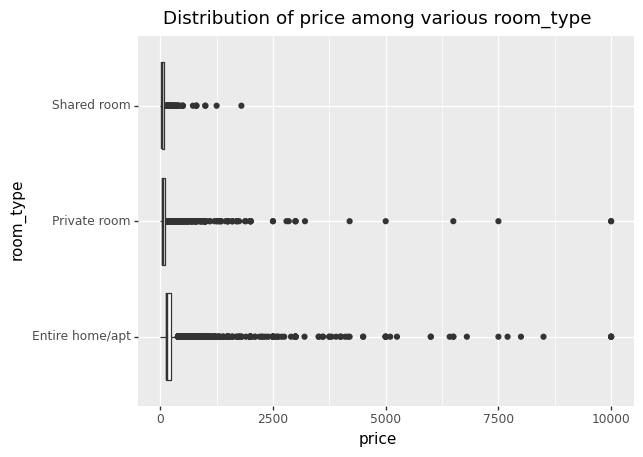

In [ ]:
# implement boxplot for room_type
boxplot(data_to_plot=df, x_colname='room_type', y_colname='price')

In [ ]:
## test of homogeneity of variance of rental price among various room_types
test_homogeneity(data=df, target_var='price', predictor_var='room_type')

Barlett test results of room_type
                 Parameter      Value
0      Test statistics (T)  4202.5695
1  Degrees of freedom (Df)     2.0000
2                  p value     0.0000 

Levene test results of room_type
                 Parameter     Value
0      Test statistics (W)  376.3143
1  Degrees of freedom (Df)    2.0000
2                  p value    0.0000 

With a p-value of 0.0 the bartlett test suggests to: reject Null hypothesis of equal variance at 5% significance level 

With a p-value of 0.0, the Levene test suggests to: reject Null hypothesis of equal variance at 5% significance level  



The test results suggest assumption of homogeneity of variance should be rejected hence a 
non-parametric method is used to test equal rental price among the various room types

In [ ]:
pg.kruskal(data=df, dv='price', between='room_type')

Source  ddof1             H  p-unc
Kruskal  room_type      2  22417.833022    0.0

The statistical test confirms the visualization that price is statistically significantly different among the 
various room types hence room_type is selected for developing model for predicting rental price prediction.

## Categorical Feature engineering

Adopting data centric approach to modelling requires strategies to develop new features that are relevant
for the modelling task and this was attended to. 

As indicated earlier, features such as last_review and reviews per month are plagued with missing values as high as 20.56% which currently means absence of data that will otherwise provide predictive signals where as imputing such values could result in introducing a significant proportion of noise. A work around this scenario is to employ feature engineering to create a new feature from this variable that hopefully provides some information for prediction. To engineer a new feature from this context, a binary categorical feature is created with values depicting whether or not the data point for last review and reviews_per_month is available or missing. This feature is termed as "review_is_available". Where data is available for reviews_per_month, a vaule of 1 is given to "review_is_available", otherwise 0. 

The rational behind creating the "review_is_available" feature is that providing a review for a rental implies the customer expresses particular interest in the rental. It could be expected that a rental that provides great value for money beyond the expectation of the customer is likely to catch the interest of the customer to an extent where they will provide a review while a rental with an average satisfaction may not attract a review. Whatever the case may be, the price of the rental is likely to be a deciding factor for the customer to leave a review. "review_is_available" will be subjected to statistical test to verify if it is indeed signifcantly related to rental price. The feature is created as follows.




In [ ]:
# 0 is giving where missing value is true and 1 where false
create_review_is_avialable = lambda x: 0 if x is True else 1


# apply function to create review_is_avialable featured
df['review_is_available'] = df['last_review'].isnull().apply(create_review_is_avialable)


# select columns to show feature created
df[['last_review', 'reviews_per_month', 'review_is_available']]

last_review  reviews_per_month  review_is_available
0        19.10.18               0.21                    1
1        21.05.19               0.38                    1
2             NaN                NaN                    0
3        05.07.19               4.64                    1
4        19.11.18               0.10                    1
...           ...                ...                  ...
48890         NaN                NaN                    0
48891         NaN                NaN                    0
48892         NaN                NaN                    0
48893         NaN                NaN                    0
48894         NaN                NaN                    0

[48895 rows x 3 columns]

In [ ]:
# create string value for review is available for visualization purpose

df['review_is_available_str'] = (df['last_review'].isnull()
  .apply(lambda x: 'review_not_available' if x is True else 'review_available')
)

In [ ]:
df

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9    19.10.18   
1      Entire home/apt    225               1                 45    21.05.19   
2         Private room    150               3                  0         NaN   
3      Entire home/apt     89               1                270    05.07.19   
4      Entire home/apt     80              10                  9    19.11.18   
...                ...    ...             ...                ...         ...   
48890     Private room     70               2                  0         NaN   
48891     Private room     40               4                  0         NaN   
48892  Entire home/apt    115              10                  0         NaN   
48893      Shared room     55               1                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

       review_is_available review_is_available_str  
0                        1        review_available  
1                        1        review_available  
2                        0    review_not_available  
3                        1        review_available  
4                        1        review_available  
...                    ...                     ...  
48890                    0    review_not_available  
48891                    0    review_not_available  
48892                    0    review_not_available  
48893                    0    review_not_available  
48894                    0    review_not_available  

[48895 rows x 14 columns]

The analysis above demonstrates creating review_is_available feature. After creating the variable, it is visualize and statistical test undertaken to determine if it is a relevant predictor for rental price modelling. This is demonstrated as follows.

### Visualizing rental price based on review_is_available predictor

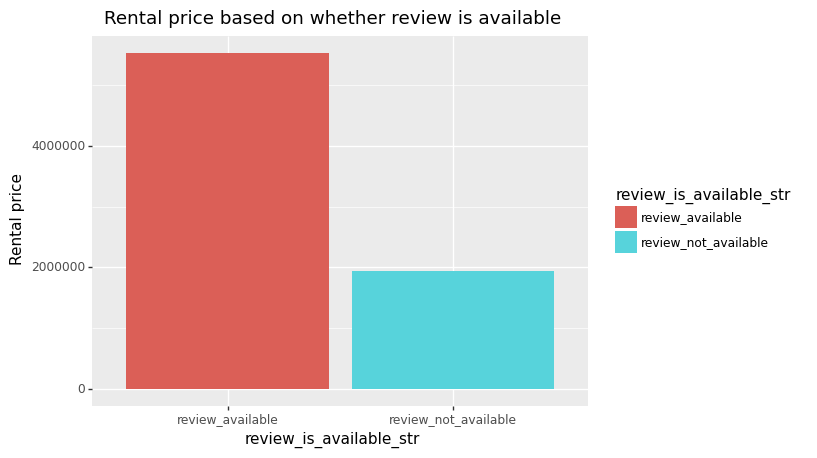

In [ ]:
barplot(data_to_plot=df, variable_to_plot='review_is_available_str', y_colname='price',
        title='Rental price based on whether review is available',
        ylabel='Rental price'
        )

The graph for the engineered feature (review_is_available) indicates it is likely to be significant predictor 
for rental price. This is deduce from the high difference in rental price between the two categories. This needs to be subjected to statistical test. First, the variance within the categories are visualized as follows.

#### Feature selection: Is review_is_available a relevant predictor of rental price? 


Both visualization and statistical test are used to determine whether review_is_available should be selected as a relevant feature for modelling. The assumption of homogeneity is visualized using boxplot as shown below.


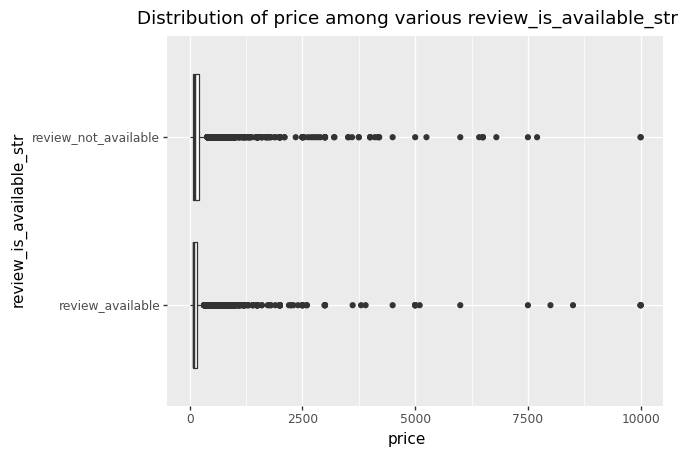

In [ ]:
# implement boxplot for review_is_available
boxplot(data_to_plot=df, x_colname='review_is_available_str',
        y_colname='price'
        )

The visualization for homogeneity is supplemented with levene and Bartlett statistical test demonstrated below.

In [ ]:
# conduct levene test 

lev_stat, lev_pvalue = stats.levene(df[df['review_is_available']==1]['price'], 
                                    df[df['review_is_available']==0]['price']
                                    )

lev_pvalue


2.2799204413064644e-75

In [ ]:
## conduct bartlett test

bart_stat, bart_pvalue = stats.bartlett(df[df['review_is_available']==1]['price'], 
                                        df[df['review_is_available']==0]['price']
                                    )

bart_pvalue

0.0

Given that the p-value for both levene and bartlett test are less 0.05 than for 5% significance level, the null hypothesis of homogeneity is rejected and non-parametric method is used to test for rental price being equal among the various categories. Welch test is used to determine if the mean rental price is equal between the two categories. Because two independent categories being review available and review not available are identified, Welch test is used. This is demonstrated as follows.




In [ ]:
df

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9    19.10.18   
1      Entire home/apt    225               1                 45    21.05.19   
2         Private room    150               3                  0         NaN   
3      Entire home/apt     89               1                270    05.07.19   
4      Entire home/apt     80              10                  9    19.11.18   
...                ...    ...             ...                ...         ...   
48890     Private room     70               2                  0         NaN   
48891     Private room     40               4                  0         NaN   
48892  Entire home/apt    115              10                  0         NaN   
48893      Shared room     55               1                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

       review_is_available review_is_available_str  
0                        1        review_available  
1                        1        review_available  
2                        0    review_not_available  
3                        1        review_available  
4                        1        review_available  
...                    ...                     ...  
48890                    0    review_not_available  
48891                    0    review_not_available  
48892                    0    review_not_available  
48893                    0    review_not_available  
48894                    0    review_not_available  

[48895 rows x 14 columns]

In [ ]:
# Conduct Welch's t-Test and print the result

review_available = df[df['review_is_available']==1]['price'] 
review_not_available = df[df['review_is_available']==0]['price']


print(stats.ttest_ind(review_available, review_not_available, equal_var = False))

Ttest_indResult(statistic=-13.623706467801082, pvalue=6.059111089968887e-42)


With a p-value less than 0.05, the null hypotheisis of equal mean rental price between review available and review not available categories is rejected based on the Welch test. 
The test confirms deductions made from the visualization that review_is_avaialble feature is likely to be associated with rental price hence predictive of it. On this basis, review_is_available feature is selected to be used for modelling

## Numeric feature selection


Techniques employed for numeric feature selection are different from that of categorical features.
Among others, multicollinearity is checked to prevent including redundant predictors.
Certain algorithms assume that the predictors are not strongly correlated to each other. Strong correlation between predictors
implies the predictors are supplying similar information to the algorithm which could lead to overfitting hence dimension reduction techniques are required to reduce them or select only variables that enable the algorithm to gain new insights from the data and improve predictive power.

Correlation analysis is undertaken on the numeric predictors to 
check for multicollinearity as follows;

In [ ]:
quant_predictor_var.append('price')

In [ ]:
quant_predictor_var

['minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'price']

In [ ]:
# select numeric features for analysis
df_numeric_var = df[quant_predictor_var]

df_numeric_var




minimum_nights  number_of_reviews  reviews_per_month  \
0                   1                  9               0.21   
1                   1                 45               0.38   
2                   3                  0                NaN   
3                   1                270               4.64   
4                  10                  9               0.10   
...               ...                ...                ...   
48890               2                  0                NaN   
48891               4                  0                NaN   
48892              10                  0                NaN   
48893               1                  0                NaN   
48894               7                  0                NaN   

       calculated_host_listings_count  availability_365  price  
0                                   6               365    149  
1                                   2               355    225  
2                                   1               365    150  
3                                   1               194     89  
4                                   1                 0     80  
...                               ...               ...    ...  
48890                               2                 9     70  
48891                               2                36     40  
48892                               1                27    115  
48893                               6                 2     55  
48894                               1                23     90  

[48895 rows x 6 columns]

In order to determine the right method to estimate the strength of relationship between variables,
scatterplot is used to visualize whether or not the variables are linearly related. Parametric 
method such as Pearson's correlation requires linear relationship, homoscedascticity and variables to be continuous. In an instance where one of the variables is discrete ordinal or one of the 
identified assumption is violated then non-parametric methods such as Spearman rho correlation is used.



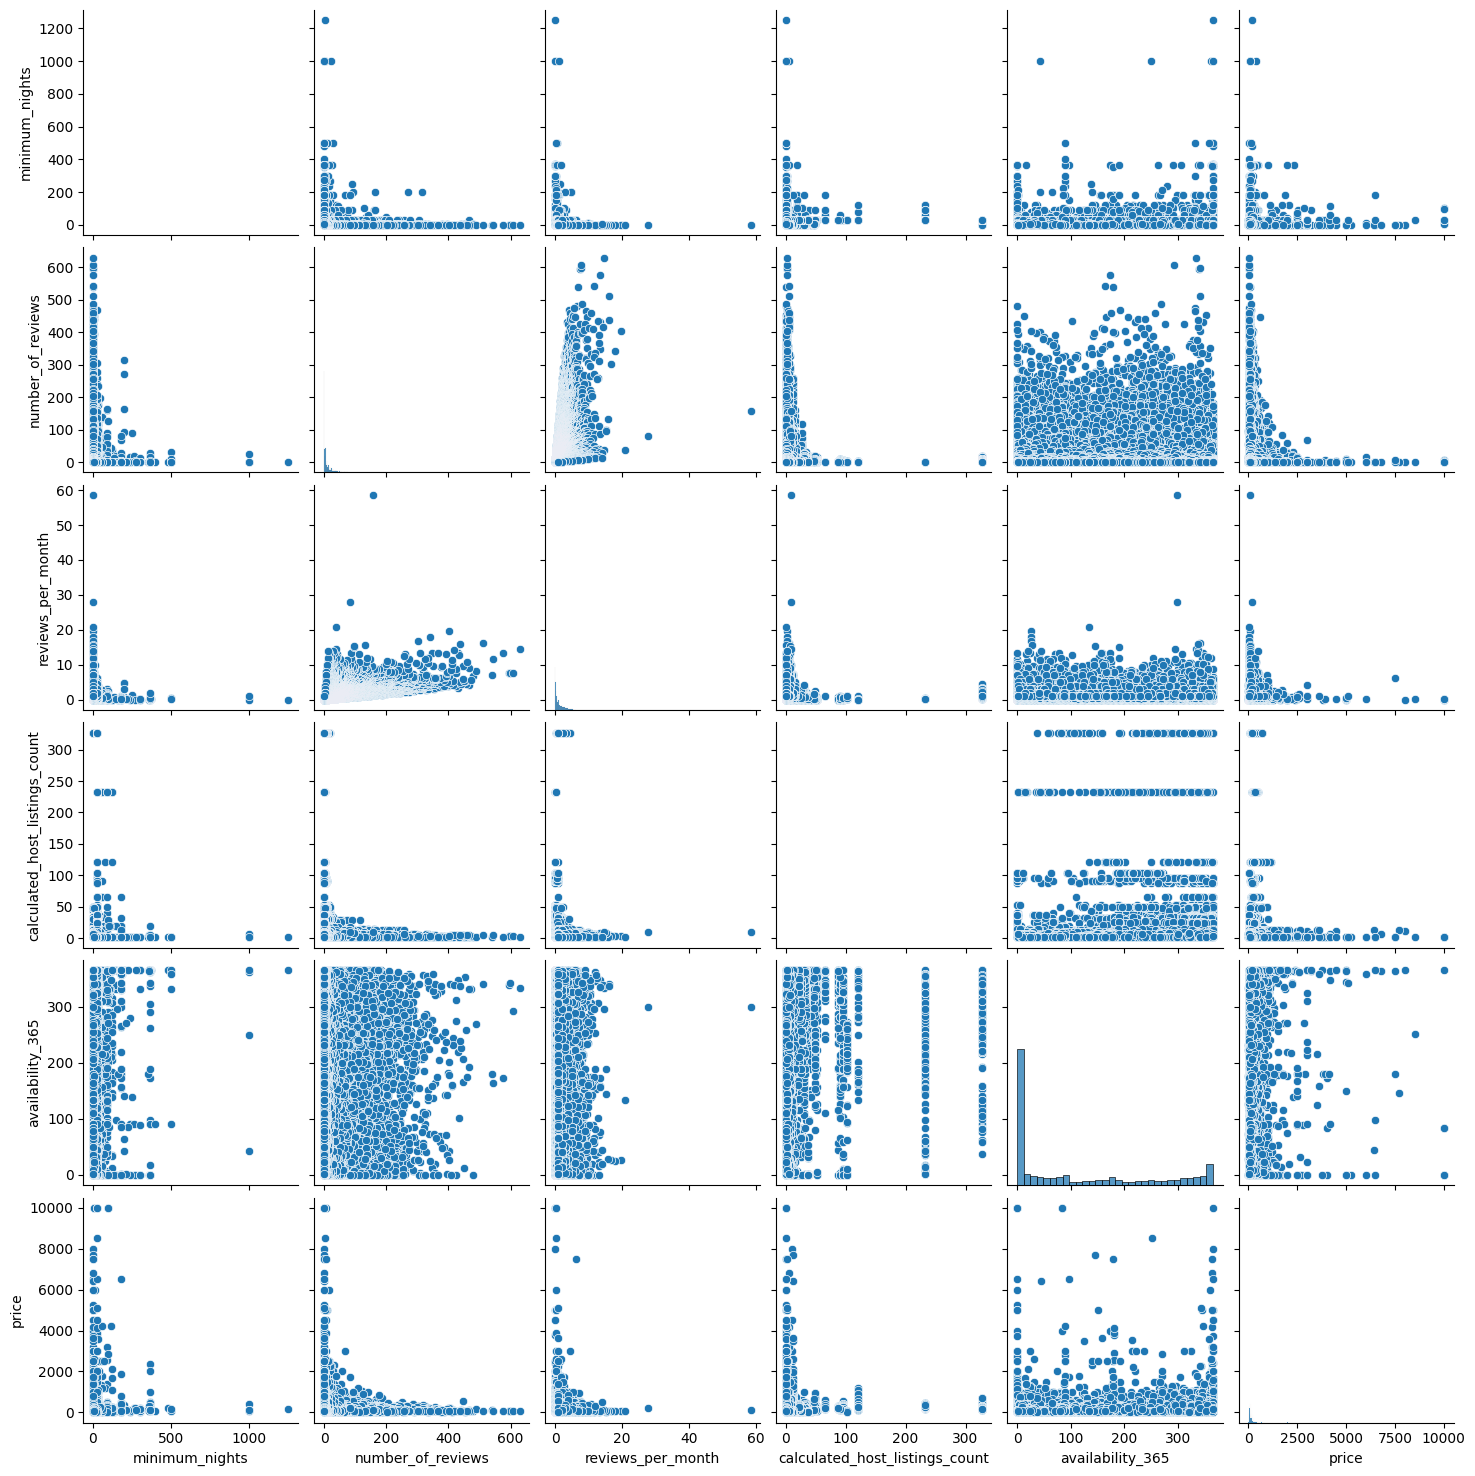

In [ ]:
sns.pairplot(data=df_numeric_var)
plt.show()

From the scatterplot visualization, a clear linear relationship is generally not discernible. Moreover, outliers are present and can influence the results of a correlation analysis. reviews_per_month and number_of_reviews appear to have a moderate positive relationship that could be linear in the absense of outliers. It is possible these predictors are correlated. A focus is made on reviews_per_month and number_of_reviews with a scatter plot to gain a clearer view.

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 10052 rows containing missing values.


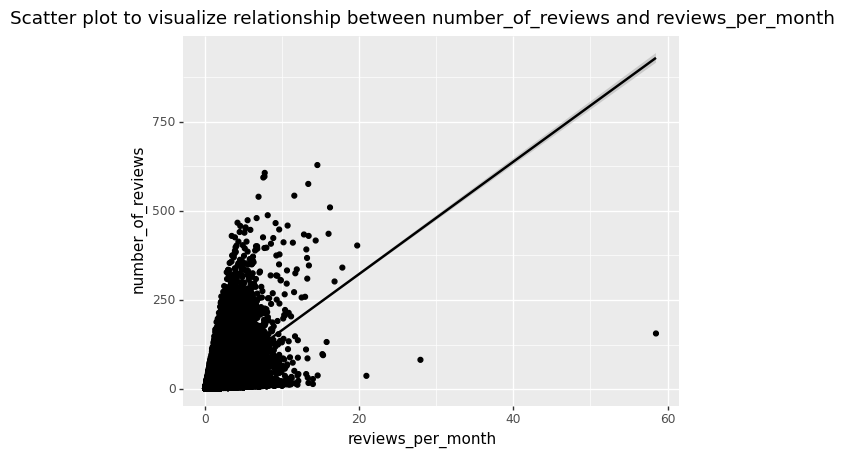

In [ ]:
plot_scatterplot(data=df, x_colname='reviews_per_month', y_colname='number_of_reviews')

The visualization shows the positive relationship between reviews_per_month and number_of_reviews could be influenced by outliers. 

Given that the various predictors are not normally distributed, Spearman correlation is used.
Pearson correlation is also undertaken to compare the results. The implementation is provided below.

In [ ]:
spearman_corr_matrix = df_numeric_var.corr(method='spearman')

spearman_corr_matrix

minimum_nights  number_of_reviews  \
minimum_nights                        1.000000          -0.174905   
number_of_reviews                    -0.174905           1.000000   
reviews_per_month                    -0.288797           0.706208   
calculated_host_listings_count        0.064117           0.056054   
availability_365                      0.075981           0.236664   
price                                 0.101289          -0.055009   

                                reviews_per_month  \
minimum_nights                          -0.288797   
number_of_reviews                        0.706208   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.146484   
availability_365                         0.392126   
price                                   -0.018527   

                                calculated_host_listings_count  \
minimum_nights                                        0.064117   
number_of_reviews                                     0.056054   
reviews_per_month                                     0.146484   
calculated_host_listings_count                        1.000000   
availability_365                                      0.406606   
price                                                -0.106083   

                                availability_365     price  
minimum_nights                          0.075981  0.101289  
number_of_reviews                       0.236664 -0.055009  
reviews_per_month                       0.392126 -0.018527  
calculated_host_listings_count          0.406606 -0.106083  
availability_365                        1.000000  0.086088  
price                                   0.086088  1.000000

The Spearman correlation suggests none of the predictors is strongly correlated with rental price as the target variable.

With the exception of number_of_reviews and reviews_per_month, all predictors have weak to moderate correlation with each other.
number_of_reviews and reviews_per_month appear to be strongly correlated with a coefficient of 0.7 as deduced from the scatterplot. Strongly correlated predictors 
provide similar signals hence redundant and lead to overfitting. For this reason, only one of them is selected for modelling which in this case is number_of_reviews. Intuitively, one can expect reviews_per_month to increase when number of reviews increases. All predictors 
that are not strongly correlated are selected for modelling.

The correlation result is visualize below.


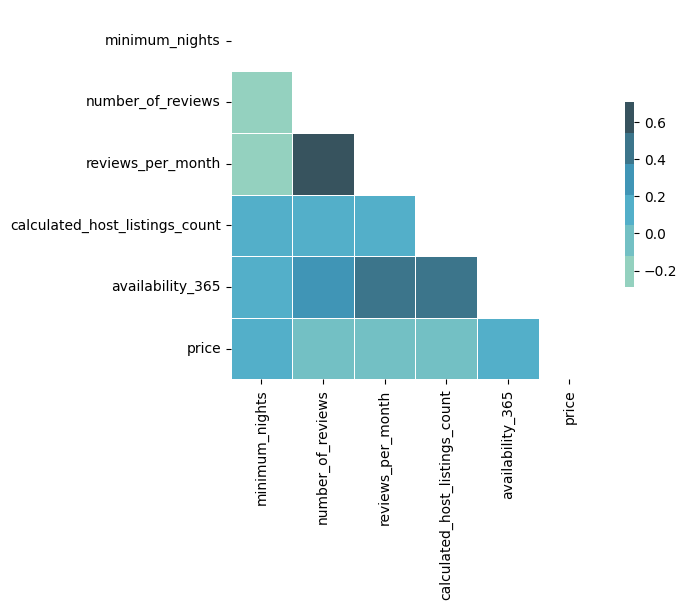

In [ ]:
# Create a mask to hide the upper triangle
mask = np.zeros_like(spearman_corr_matrix)
mask[np.triu_indices_from(mask)] = True

# visualize correlation matrix
sns.heatmap(spearman_corr_matrix, mask=mask, cmap=sns.color_palette("GnBu_d"), 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            )


plt.show()

Comparing the Spearman correlation to the Pearson correlation below, a lower pearson coefficient of 0.55 was recorded between 

number_of_reviews and reviews_per_month. Pearson correlation are known to be highly sensitive to outliers hence given that outliers are present in the data decisions are made based on the Spearman rho correlation.

In [ ]:
pearson_corr_matrix = df_numeric_var.corr(method='pearson')

pearson_corr_matrix

minimum_nights  number_of_reviews  \
minimum_nights                        1.000000          -0.080116   
number_of_reviews                    -0.080116           1.000000   
reviews_per_month                    -0.121702           0.549868   
calculated_host_listings_count        0.127960          -0.072376   
availability_365                      0.144303           0.172028   
price                                 0.042799          -0.047954   

                                reviews_per_month  \
minimum_nights                          -0.121702   
number_of_reviews                        0.549868   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.009421   
availability_365                         0.185791   
price                                   -0.030608   

                                calculated_host_listings_count  \
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.009421   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   
price                                                 0.057472   

                                availability_365     price  
minimum_nights                          0.144303  0.042799  
number_of_reviews                       0.172028 -0.047954  
reviews_per_month                       0.185791 -0.030608  
calculated_host_listings_count          0.225701  0.057472  
availability_365                        1.000000  0.081829  
price                                   0.081829  1.000000

####   Visualizing outliers

#### Boxplot to visualize outliers

Some algorithms are impacted by the presence of outliers hence analyzed to make an inform decision on which class of algorithm to choose from.

In [ ]:
# function to create boxplot
def make_boxplot(data: pd.DataFrame, variable_name: str):
    """This function accepts a data and variable name and returns a boxplot

    Args:
        data (pd.DataFrame): Data to visualize
        variable_name (str): variable to visualize with boxplot
    """
    fig = px.box(data_frame=data, y = variable_name,
                 template='plotly_dark', 
                 title = f'Boxplot to visualize outliers in {variable_name}',
                 height=700
                 )
    fig.show()

In [ ]:
# plot outliers
for var in quant_predictor_var:
    make_boxplot(data=df, variable_name=var)

With the exception of availability_365, outliers are present in all other predictors as visualized by the boxplot.
A decision is made to choose a model that is fairly robust against outliers as the first approach without treating them and secondly
to develop a model with outlier treatment and compare the results. Generally, outliers can be imputed
with various methods some of which are demonstrated in the section for developing model based on imputed outlier data points.

### Handling missing data 

As already indicated during the descriptive statistics section, reviews_per_months and last_review had 
as much as 20.56% data missing which when imputed could introduce a sizeable amount of noise if the imputation strategy does not work well enough. Removing the feature or missing data point will result in loss of data. 
The approach adopted was to engineer the feature into a new one termed as review_is_available. With this approach, the missing data points are also used in the model hence no data is lost. Secondly, it was realized during multicollinearity check that reviews_per_months was correlated with number_of_reviews hence number_of_reviews was selected and with this approach missing data was strategically handled.



### Using insights gained from exploratory analysis to inform modelling approach

The findings of non-linear relationship between 
the predictors and target variable, presence of outliers,
and sizeable missing values suggest that a non-parametric
model that handles non-linear relationship,
outliers and missing values will be appropriate for the task. Also, the fact missing data has already been handled through feature engineering and selection was also considered.
 
Moreover, as identified in the objectives, the focus of the task is to achieve good precision with a minimum requirement of being better than random guesses rather than interpretability of the model and this informed a decision to choose an algorithm that satisfy these needs. 


On the basis of the findings from the exploratory analysis, a model 
that employs decision tree will be used. Hence, Random Forest Regressor algorithm from the sklearn library is implemented.

Given that the target variable is known and continuous, supervised regression is used for the task. 


From the exploratory analysis, the filter-based selection method resulted in the selection of 'neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' and 'availability_365' as predictors for modelling. In addition, 
'review_is_available' is produced from feature engineering to be added to predictors for modelling.
       

## Preprocessing data for machine learning
The preprocessing pipeline for predictors to be prepared for modeling is highlighted as follows

1. Multi-class categorical variables are encoded using One-hot encoding strategy 
2. Numercial variables are scaled using the standard scaler.

The preprocessing pipeline is implemented as follows: 

#### Encoding categorical variables to prepare them for modelling

While several encoding strategies exist to transform categorical variable into 
forms that machine learning models can understand, one hot encoding was used 
in this task. In the absence of high cardinality predictor, one hot encoding does not introduce the challenge of exponential growth of dimension and its associated curse of dimensionality hence appropriate. The preprocessing pipeline is implemented as follows:  


In [ ]:
quant_predictor_var

['minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'price']

In [ ]:
# put all variables to be used for modelling into a namespace for easier use
args = Namespace(
    target_variable = 'price',
    categorical_features= ['neighbourhood_group', 'room_type', 'review_is_available_str'],
    selected_numeric_features= ['minimum_nights', 'number_of_reviews',
                                'calculated_host_listings_count',
                                'availability_365'
                            ],
    predictors = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews',
                   'calculated_host_listings_count',
                  'availability_365', 'review_is_available_str'
                  ]
    
)

### Create preprocessing pipeline

After segmenting the variables into different groups and identifying the required preprocessing techniques,
a preprocessing pipeline is created to process them. This is implemented as follows.

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocess_pipeline =  ColumnTransformer([('scaler', 
                                           scaler, args.selected_numeric_features
                                           ),
                                          ('ohe',ohe, args.categorical_features)
                                          ], remainder='passthrough'
                                        )

### Splitting into Training and Testing dataset

Deciding on data splitting ratio for learning and evaluation is rather subjective. For this
task, 70% of the data is used for training and 30% for validation. Given that, there is relatively enough data,
70% dataset will likely provide enough data points to learn and derive as much insight from and 30% will still probably be enough to evaluate the model on data points capturing enough of the varying charateristerics that are unknown to the model. 

In order to gain an objective evaluation of the model, cross validation will be performed. This means that the training dataset,
will be further splitted during the training process into train and validation set while running the algorithm. Cross validation provides a more objective view on the true accuracy of the model.

Before splitting the data, steps are taken to separate the target data from that of predictors.

The process is implemented as follows.

#### Data splitting is implemented as follows;

In [ ]:
# create separate variable for target and predictors
y = df[args.target_variable]
X = df[args.predictors]

# split inot train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=2023
                                                    )


### Deciding on evaluation metric 

For this task, the evaluation metric is defined to be root mean square error (RMSE). This metric penalizes higher errors more 
in order to optimze the model for accuracy and more importantly the results are in the units of the target variable which is rental price in this case.

### Defining baseline model

Modelling can be an iterative process in attempt to optimize and arrive at the best generalizable model. 

While achieving the best accuracy also means doing a lot of experimentation with different models and monitoring 
their results, this is not possible with the limited time and computational resource designated for this task. What is however, 
considered critical is that the model produced adds value to business. By this, a hypothetical situation is considered, 
whereby stakeholders are currently making random guesses about rental prices. In this case, 
the model to be developed need to perform better than those random guesses in general in order to be deemed as providing business value and worth the price and cost of developing it. This implies an element of comparison which can be achieved by defining
a baseline model that the model to be developed is compared to. It is worth noting that, any model to be developed 
needs to perform better than the baseline model, only than can it be compared with other models that perform better
than the baseline model base on accuracy.


But, how do we define the baseline model without ever fitting one?


A possible approach to that is to define the random guess prediction to be the mean of all prices in the training dataset. 
With this, the error of the baseline model is estimated to be the difference between the average prediction 
and actual price. Estimating the RMSE of that gives the accuracy of the baseline model which the model to be developed 
needs to do better than to be considered for selection. This forms the intuition behind the baseline model and is implemented as follows.



In [ ]:
#%% mean rental price based on training data
mean_price = y_train.mean()
print(f"Average price is {mean_price: .3f}")



Average price is  151.449


In [ ]:
# Baseline model RMSE 
baseline_test_pred = np.full(shape=len(y_test), fill_value=mean_price)
baseline_test_rmse = mean_squared_error(y_true=y_test, 
                                        y_pred=baseline_test_pred, 
                                        squared=False
                                        )

baseline_train_pred = np.full(shape=len(y_train), fill_value=mean_price)
baseline_train_rmse = mean_squared_error(y_true=y_train, 
                                         y_pred=baseline_train_pred, 
                                         squared=False
                                         )


print(f"Train data RMSE for baseline model: {baseline_train_rmse: .3f}")
print(f"Test data RMSE for baseline model: {baseline_test_rmse: .3f}")

Train data RMSE for baseline model:  229.990
Test data RMSE for baseline model:  262.346


The baseline model defined is assessed to have a Test RMSE of 262.346. Thus, the model to be developed should be 
capable of achieving a RMSE lower than that on test data in order to be deem better and capable of adding business value.




### Developing model for rental price prediction -- Random Forest Regressor

After defining the baseline model performance, the model pipeline is created to be added to the preprocessing pipeline.
As indicated earlier, RandomForestRegressor is employed. The model pipeline is implemented below.



In [ ]:
rand_forest = RandomForestRegressor(bootstrap=True, max_features=0.45, 
                                    min_samples_leaf=3, 
                                    min_samples_split=7, 
                                    n_estimators=100, 
                                    random_state=2023
                                    )

### Implementing the preprocessing pipeline

The data to be passed to the model first goes through the preprocessing pipeline to be transformed before the agorithm is applied to it.
Worthy of notice is that, the preprocessing pipeline is only fitted on the training data but used to transform both training and testing data.
The pipeline is not fitted on the test data to prevent data leakage. This is implemented as follows.




In [ ]:
def apply_preprocess(predictor_data: pd.DataFrame, 
                     preprocess_pipeline: ColumnTransformer, 
                     preprocess_type: str = 'fit_transform'
                     ):
    preprocess_pipeline_obj = preprocess_pipeline
    if preprocess_type == 'fit_transform':
        sparse_obj = preprocess_pipeline_obj.fit_transform(predictor_data)
        X_train_dense = sparse_obj
        return X_train_dense
    elif preprocess_type == 'transform':
        sparse_obj = preprocess_pipeline_obj.transform(predictor_data)
        return sparse_obj
        

In [ ]:
# fit and transform train data
X_train_prep = apply_preprocess(predictor_data=X_train, 
                                preprocess_pipeline=preprocess_pipeline, 
                                preprocess_type='fit_transform'
                                )

# use the fitted preprocess to transform test data
X_test_prep = apply_preprocess(predictor_data=X_test, 
                               preprocess_pipeline=preprocess_pipeline, 
                               preprocess_type='transform'
                               )


### Creating cross validation of model

In fitting the model, cross validation approach with 20 folds is used which is a more objective assessment of the model given that it is 
fitted and evaluated on different training samples to gain a clearer understanding of how the model will perform on unseen data. 'neg_root_mean_squared_error' is used for scoring which is essentially the negative version of the define evaluation metric. The performance evaluation is the mean of the cross validation.

The actual selection of model is based on RMSE of test dataset.
This is implemented below.

In [ ]:
rand_forest_cv = cross_validate(estimator=rand_forest,
                                X=X_train_prep, 
                                y=y_train,
                                cv=20, scoring='neg_root_mean_squared_error', 
                                n_jobs=-1
                            )

In [ ]:
rand_forest_cv_mean = rand_forest_cv['test_score'].mean()

print(f'20 fold Cross validation Negative RMSE is {rand_forest_cv_mean}')

20 fold Cross validation Negative RMSE is -204.15964939010834


The cross validation result of 20 folds shows a negative RMSE of -200.308. This is only a cross validatation of the model and now the model has to be fitted 
and evaluated on the test set. The code is provided below.


In [ ]:
rand_forest.fit(X=X_train_prep, y=y_train)

train_rmse = mean_squared_error(y_true=y_train, 
                                y_pred=rand_forest.predict(X_train_prep), 
                                squared=False
                                )

print(f'Model training error (RMSE) is: {train_rmse: .3f}')



Model training error (RMSE) is:  181.358


The various parameters used in fitting the model is shown below.

### Evaluation of Model on test set
The Root Mean Squared Error metric is used to evaluate the model as follows

In [ ]:
test_rmse = mean_squared_error(y_true=y_test, 
                               y_pred=rand_forest.predict(X_test_prep), 
                               squared=False
                               )


print(f'Model test error (RMSE) is: {test_rmse: .3f}')



Model test error (RMSE) is:  248.171


The result shows a training RMSE of 181.358 and 248.171 for the test set RMSE. 
The model performs better than the baseline model hence capable of 
offering business value. As expected, the training set error is lower than the test set error. The difference between the training RMSE and test RMSE is relatively high which may suggest overfitting.

In assessing the model, cross-validation evaluation is deem to be more representative of model's true performance and aids the hyperparameter optimization. Nonetheless, the test error is the main benchmark for evaluating the model to gain insight on how it performs on unseen data.

Hyperparameter optimization of the model will not only improve its precision and performance but also better business value hence demonstrated as follows.


#### Hyperparameter tuning with Random Grid Search

The first model trained is doing a better job than random guess (suggested by the baseline model) hence partly 
achieving the objective of the task. Nonetheless, the aim is to reduce error as much as possible to increase precision of prediction. 


It is duely recognized that a different algorithm may achieve a better performance and this indeed is often an explored option for achieving better precision of predictions. However, with limited time, it seems exploring options to improved the developed model is a better option. Hence, techniques are explored to tune hyperparameters of the model developed to attain better performance.


Hyperparameter tuning can be undertaken using the grid search where a set of parameters is specified and a search is made using various combinations or permutation to test which combination best reduces error. 

Another approach is the Radomized grid search where a distribution is specified for numeric parameters and the algorithm randomly selects the values of the hyperparameters within the range or condition specified to optimize the model. The difference is that all possible combinations are used in grid search while random search randomly choose some of the combination a number of times equal to the value of n_iter argument specified. The model fitted with paramters randomly selected is evaluated on the validation set.

For this task, random grid search was demonstrated as a strategy of improving model performance. Given the time and computational constraints, limited search space was specified to tune Random Forest Regressor. Designing a good hyperparameter optimization space to search from in that context needs a strategy. This can be guided by deductions made from the training of model. 5 fold CV is used during the hyperparameter tuning and once the best estimator is identified from them, it is cross validated on 20 folds to gain a model evaluation that is more objective and comparable to the 20 fold CV done for the first model. 

The discussion is implemented as follows.



In [ ]:
hyperparameter_space = {
                        'n_estimators': np.random.randint(low=100, high=500, size=500),
                        'min_samples_split': np.random.randint(low=5, high=15, size=10),
                        'min_samples_leaf': np.random.randint(low=2, high=10, size=5),
                        'max_features': np.random.uniform(low=0.1, high=1, size=10),
                        'bootstrap': [True, False]
            }

In [ ]:
rf_random_search = RandomizedSearchCV(estimator=rand_forest, 
                                      param_distributions=hyperparameter_space,
                                      n_iter=10,
                                      cv=5,
                                      refit=True,
                                      return_train_score=True, 
                                      n_jobs=-1,
                                      random_state=2023,
                                      scoring='neg_root_mean_squared_error'
                                      )


In [ ]:
rf_random_search.fit(X=X_train_prep, y=y_train) 


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features=0.45,
                                                   min_samples_leaf=3,
                                                   min_samples_split=7,
                                                   random_state=2023),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': array([0.72564931, 0.89854915, 0.48445311, 0.32757222, 0.68580117,
       0.75213656, 0.98339352, 0.7921718 , 0.69121857, 0.92420429]),
                                        'min_samples_leaf': array([6, 9...
       109, 428, 334, 124, 150, 130, 114, 266, 425, 273, 317, 220, 351,
       155, 128, 169, 156, 453, 435, 330, 148, 483, 150, 263, 325, 287,
       212, 381, 305, 316, 227, 452, 363, 460, 487, 300, 148, 327, 167,
       450, 199, 286, 120, 466, 294, 173, 192, 284, 133, 441, 346, 211,
       170, 309, 312, 481, 378, 342, 221, 188, 133, 349, 102, 127, 223,
       207, 307, 495, 441, 165, 439])},
                   random_state=2023, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [ ]:
rf_random_search.best_score_

-210.06094777551874

In [ ]:
rf_random_search_20cv = cross_validate(estimator=rf_random_search.best_estimator_, 
                                        X=X_train_prep, 
                                        y=y_train, cv=20, n_jobs=-1, 
                                        scoring='neg_root_mean_squared_error'
                                    )

In [ ]:
rf_random_search_20cv['test_score'].mean()

-203.78527121752757

The parameters for the best estimator identified is as follows:

In [ ]:
rf_random_search.best_params_

{'n_estimators': 235,
 'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_features': 0.4844531135452981,
 'bootstrap': True}

In [ ]:
# evaluation of tuned model on test set
mean_squared_error(y_true=y_test, 
                   y_pred=rf_random_search.predict(X_test_prep), 
                   squared=False
                   )

246.54051213718571

The hyperparameter tuning was done as a quick search with a small hyperparameter search space that is explored more extensively with a high number of iterations for demonstration purpose only. A well designed parameter set will take a longer computational time to achieve good result. 


The key message is that hyperparameter tuning can lead to reducing error. For this, a very small improvement is noted on test data RMSE which was reduced to 246.541 compared to 248.171 of the first model.


That noted, the best estimator from the hyperparameter tuning exercise can be fitted on the training data and evaluated on the test data to assess overfitting as follows. 

In [ ]:
best_tuned_rand_forest = rf_random_search.best_estimator_
rf_train_RMSE = mean_squared_error(y_train, best_tuned_rand_forest.predict(X_train_prep), squared=False)


rf_test_RMSE = mean_squared_error(y_test, best_tuned_rand_forest.predict(X_test_prep), squared=False)

print(f"The training RMSE for Best tuned random Forest is: {rf_train_RMSE: .3f}")

print(f"The test RMSE for Best tuned Random Forest is: {rf_test_RMSE: .3f}")


The training RMSE for Best tuned random Forest is:  193.972
The test RMSE for Best tuned Random Forest is:  246.541


In addition to the improved performance, it can be argued that the tuned model slightly reduces overfitting. This is deduced from the tuned model having a lower difference between the training RMSE (193.972) and test RMSE (246.541) when compared to the untuned model with higher difference between training RMSE(181.358) and test RMSE(248.171).


Overfitting is an important element that needs to be tackled in modelling and bagging is demonstrated as technique for that in this task.

### Bagging as an approach to improving model performance and overfitting

Bootstrap Aggregating (bagging) as a technique is used to reduce overfitting and error further.
Bagging involves multiple random sampling with replacement and for each sample Random Forest is trained on to produce scores which are aggregated. As expected, this helps reduce overfitting as more samples are fitted on by model hence more stable to unseen data. The prediction from a bagging regressor is often the average of all predictions from all estimators used on various samples of the data.

Bagging is implemented for the RandonRorestRegressor as follows







In [ ]:
# Use best parameters from tuned model for bagging 
bagging = BaggingRegressor(estimator=RandomForestRegressor(bootstrap=True, 
                                                           max_features= 0.4844531135452981,
                                                           min_samples_leaf=6, 
                                                           min_samples_split=6, 
                                                           n_estimators=235
                                                        ),
                            n_estimators=30,
                            random_state=2023,
                            n_jobs=-1
                          )

In [ ]:
bagging.fit(X=X_train_prep, y=y_train)

BaggingRegressor(estimator=RandomForestRegressor(max_features=0.4844531135452981,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 n_estimators=235),
                 n_estimators=30, n_jobs=-1, random_state=2023)

In [ ]:
#%% RMSE to evaluate bagged Random forest
bagg_randforest_train_rmse = mean_squared_error(y_train, 
                                                bagging.predict(X_train_prep),
                                                squared=False
                                                )

bagg_randforest_test_rmse = mean_squared_error(y_test, 
                                                bagging.predict(X_test_prep), 
                                                squared=False
                                                )

print(f"Bagged Random Forest training dataset RMSE: {bagg_randforest_train_rmse: .3f}")

print(f"Bagged Random Forest testing dataset RMSE: {bagg_randforest_test_rmse: .3f}")



Bagged Random Forest training dataset RMSE:  199.982
Bagged Random Forest testing dataset RMSE:  245.791


In [ ]:
bagging_cv20 = cross_validate(estimator=bagging,
                              X=X_train_prep, 
                              y=y_train,
                              cv=20, scoring='neg_root_mean_squared_error',
                              n_jobs=-1
                            )

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [ ]:
bagging_cv20['test_score'].mean()

-203.8285224942528

The result for bagging of RandomForestRegressor is evaluated to have reduce test RMSE to 245.791 as compared to  test RMSE of 248.171 for model with default parameter and 246.541 test RMSE for tuned model.


In terms of comparing RMSE of 20 fold cross validation, the bagged model performed a little worst with 203.829 RMSE compared to 203.785 RMSE of the tuned model. Both had better performance compared to the default first model with RMSE of 204.160. The difference is rather marginal.

## Analysis and handling of outliers

While boxplot have been used to as a graphical method to identify and visualize outliers so far, a number of statistical techniques exist for detecting outliers. 
This includes using the standard deviation method whereby data points that are more than 3 standard deviations  are considered outliers. Interquantile range is equally used as a technique for identifying outliers. In this case, a value is regarded as an outlier when it is greater than 1.5 times the interquartile range above the third quartile or below the first quartile. For this, upper limits and lower limits defined for capping outliers. 

A number of strategies exist to treat outliers and this includes trimming, capping, imputing with mean or other forms of descriptive statistics and various forms of transformation such as logarithmic and square root among others. 


The interquartile range method is employed here to identify outliers and winsorization is used to treat outliers. In this case, outliers are set to the upper limit and lower limit defined after estimating the interquantile range times 1.5.



Given that the dataset is plagued with outliers, identifying and treating outliers is likely to be frequently required. Putting that into consideration, code reusability and maintainability becomes important hence object-oriented programming will be appropriate. By this, the algorithm for that is implemented as a class. A class is implemented to accept data and variable to be analyzed for which each certain behaviours are defined as functions such as identifying and getting outlier samples and imputing outliers. Certain attributes such as upper limit and lower limit used among others would also be worth accessing for perusal by the user. This is implemented below.





In [ ]:
class OutlierImputer(object):
  def __init__(self, data: pd.DataFrame, colname: str):
    self.data = data
    self.colname = colname
    self.first_quantile = self.data[self.colname].quantile(q=0.25)
    self.third_quantile = self.data[self.colname].quantile(q=0.75)
    self.inter_quantile_rng = 1.5*(self.third_quantile-self.first_quantile)
    self.upper_limit = self.inter_quantile_rng + self.third_quantile
    self.lower_limit = self.first_quantile - self.inter_quantile_rng

  @property
  def get_outlier_samples(self):
    outlier_samples = (self.data[(self.data[self.colname] > self.upper_limit) | 
                               (self.data[self.colname] < self.lower_limit)]
                              [[self.colname]]
                      )
    return outlier_samples



  def impute_outlier(self):
    self.outlier_data = self.data.copy()
    self.outlier_data[f'{self.colname}_outlier_imputed'] = (
                    np.where(self.outlier_data[self.colname] > self.upper_limit, 
                                                   self.upper_limit, 
                             np.where(self.outlier_data[self.colname] < self.lower_limit, 
                                                   self.lower_limit, 
                             self.outlier_data[self.colname]
                            )
                            )
                  )
    
    return self.outlier_data
    


**Demonstration of how to use outlier imputer class**

The usage of the outlier imputer class is demonstrated on price and afterwards it is used to impute outlier for all quantitative predictors for modelling.

In [ ]:
# initializing the outlier imputer class
outlier_imputer = OutlierImputer(data=df, colname='price')

In [ ]:
# get first quantile value for price
outlier_imputer.first_quantile

69.0

In [ ]:
# get third quantile value for price
outlier_imputer.third_quantile

175.0

In [ ]:
# get lower limit of price below which a value is regarded as outlier
outlier_imputer.lower_limit

-90.0

In [ ]:
# get upper limit of price above which a value is regarded as outlier
outlier_imputer.upper_limit

334.0

In [ ]:
# get prices which are flagged as outliers
outlier_imputer.get_outlier_samples

price
61       375
85       800
103      500
114      350
121      400
...      ...
48758    350
48833    475
48839    800
48842    350
48856    345

[2972 rows x 1 columns]

In [ ]:
# show result for imputing outliers of price
price_outlier_imputed = outlier_imputer.impute_outlier()

price_outlier_imputed[['price', 'price_outlier_imputed']]

price  price_outlier_imputed
0        149                  149.0
1        225                  225.0
2        150                  150.0
3         89                   89.0
4         80                   80.0
...      ...                    ...
48890     70                   70.0
48891     40                   40.0
48892    115                  115.0
48893     55                   55.0
48894     90                   90.0

[48895 rows x 2 columns]

In [ ]:
## price outliers and imputed values

(price_outlier_imputed[price_outlier_imputed['price']>outlier_imputer.upper_limit]
 [['id', 'price', 'price_outlier_imputed']]
 )

id  price  price_outlier_imputed
61        15396    375                  334.0
85        19601    800                  334.0
103       23686    500                  334.0
114       26933    350                  334.0
121       27659    400                  334.0
...         ...    ...                    ...
48758  36420289    350                  334.0
48833  36450896    475                  334.0
48839  36452721    800                  334.0
48842  36453160    350                  334.0
48856  36457700    345                  334.0

[2972 rows x 3 columns]

In [ ]:
## plot price after imputing outliers

make_boxplot(data=price_outlier_imputed, variable_name='price_outlier_imputed')

Using the OutlierImputer class as demonstrated above, the outliers of all quantitative variables are identified and treated as follows.

In [ ]:
for var in quant_predictor_var:
  outlier_imputer = OutlierImputer(data=df, colname=var)
  print(f'First quantile of {var}: {outlier_imputer.first_quantile}')
  print(f'Third quantile of {var}: {outlier_imputer.third_quantile}')
  print(f'Lower limit of {var}: {outlier_imputer.lower_limit}')
  print(f'Upper limit of {var}: {outlier_imputer.upper_limit}')
  print(f'Number of outliers in {var}: {len(outlier_imputer.get_outlier_samples)}')
  df = outlier_imputer.impute_outlier()
  make_boxplot(data=df, variable_name=f'{var}_outlier_imputed')

First quantile of minimum_nights: 1.0
Third quantile of minimum_nights: 5.0
Lower limit of minimum_nights: -5.0
Upper limit of minimum_nights: 11.0


First quantile of number_of_reviews: 1.0
Third quantile of number_of_reviews: 24.0
Lower limit of number_of_reviews: -33.5
Upper limit of number_of_reviews: 58.5


First quantile of reviews_per_month: 0.19
Third quantile of reviews_per_month: 2.02
Lower limit of reviews_per_month: -2.555
Upper limit of reviews_per_month: 4.765000000000001


First quantile of calculated_host_listings_count: 1.0
Third quantile of calculated_host_listings_count: 2.0
Lower limit of calculated_host_listings_count: -0.5
Upper limit of calculated_host_listings_count: 3.5


First quantile of availability_365: 0.0
Third quantile of availability_365: 227.0
Lower limit of availability_365: -340.5
Upper limit of availability_365: 567.5


First quantile of price: 69.0
Third quantile of price: 175.0
Lower limit of price: -90.0
Upper limit of price: 334.0


**Developing model with treated outliers**

In other to understand the impact of imputing outliers on the model, variables for which outliers have been treated are use to build the model. In this case, the same algorithm (Random Forest Regressor) with same parameters used to to develop the first model is employed. The full process and techniques of reducing error and overfitting such as hyperparameter optimization and bagging is not explored due to time constraints. The comparison is made with the first model where the model share the same characteristics except the imputation of outlier. Worthy of notice is the fact that a proper comparison requires a different baseline model for the outlier imputed predictors given that outlier imputation changes the distribution of the data from which the algorithm learns. Thus,a baseline benchmark model is defined following same assumptions and procedure for the outlier based model. Infact, the real impact of treating outliers on the algorithm can be assessed by considering how much improvement it makes on the baseline model.  The implementation is shown as follows.






In [ ]:
# put all variables to be used in the modelling into a namespace for easier use
outlier_args = Namespace(
    target_variable = 'price_outlier_imputed',
    categorical_features= ['neighbourhood_group', 'room_type', 
                           'review_is_available_str'
                           ],
    selected_numeric_features= ['minimum_nights_outlier_imputed',
                                'number_of_reviews_outlier_imputed',
                                'calculated_host_listings_count_outlier_imputed',
                                'availability_365_outlier_imputed'
                                ],
    predictors = ['neighbourhood_group', 'room_type', 
                  'minimum_nights_outlier_imputed',
                  'number_of_reviews_outlier_imputed',
                  'calculated_host_listings_count_outlier_imputed',
                  'availability_365_outlier_imputed',
                   'review_is_available_str'
                  ]
    
)


In [ ]:
# preprocess pipeline for outlier imputed data
preprocess_pipeline_outimput =  ColumnTransformer([('scaler', 
                                           scaler, outlier_args.selected_numeric_features
                                           ),
                                          ('ohe',ohe, outlier_args.categorical_features)
                                          ], remainder='passthrough'
                                        )

In [ ]:
# splitting outlier imputed data
y_outlier_imputed = df[outlier_args.target_variable]
X_outlier_imputed = df[outlier_args.predictors]

X_train_outimput, X_test_outimput, y_train_outimput, y_test_outimput = train_test_split(X_outlier_imputed, 
                                                                                        y_outlier_imputed, 
                                                                                        test_size=.3, 
                                                                                        random_state=2023
                                                                                        ) 

**Define baseline benchmark model for outlier treatment**

In [ ]:
# mean price in the training data when Outlier is treated
mean_price_outlier_imputed = y_train_outimput.mean()
print(f"Average price in training set when outlier is treated {mean_price_outlier_imputed: .3f}")


# Baseline model RMSE for outlier imputer data
baseline_train_outimput_pred = np.full(shape=len(y_train_outimput), 
                                 fill_value=mean_price_outlier_imputed
                                 )
baseline_train_outimput_rmse = mean_squared_error(y_true=y_train_outimput, 
                                            y_pred=baseline_train_outimput_pred, 
                                            squared=False
                                            )

# based on seen train data, guesses are made as prediction for unseen test data
baseline_test_outimput_pred = np.full(shape=len(y_test_outimput), 
                                      fill_value=mean_price_outlier_imputed
                                      )
baseline_test_outimput_rmse = mean_squared_error(y_true=y_test_outimput, 
                                                 y_pred=baseline_test_outimput_pred, 
                                                 squared=False
                                                 )


print(f"baseline model train RMSE when Outlier imputed: {baseline_train_outimput_rmse: .3f}")
print(f"baseline model test RMSE when Outlier imputed: {baseline_test_outimput_rmse: .3f}")

Average price in training set when outlier is treated  132.491
baseline model train RMSE when Outlier imputed:  83.306
baseline model test RMSE when Outlier imputed:  84.054


The model to be developed when outliers are treated needs to produce a test RMSE lower than 84.054 to be regarded as capable of adding value to business.

In [ ]:
# fit and transform outlier treated train data
X_train_outimput_prep = apply_preprocess(predictor_data=X_train_outimput, 
                                preprocess_pipeline=preprocess_pipeline_outimput, 
                                preprocess_type='fit_transform'
                                )

# use the fitted preprocess to transform outlier treated test data
X_test_outimput_prep = apply_preprocess(predictor_data=X_test_outimput, 
                               preprocess_pipeline=preprocess_pipeline_outimput, 
                               preprocess_type='transform'
                               )




In [ ]:
rand_forest_outimput = RandomForestRegressor(bootstrap=True, max_features=0.45, 
                                            min_samples_leaf=3, 
                                            min_samples_split=7, 
                                            n_estimators=100, 
                                            random_state=2023
                                            )

In [ ]:
rand_forest_outimput_cv20 = cross_validate(estimator=rand_forest_outimput,
                                            X=X_train_outimput_prep, 
                                            y=y_train_outimput,
                                            cv=20, 
                                           scoring='neg_root_mean_squared_error', 
                                            n_jobs=-1
                                        )

In [ ]:
rand_forest_outimput_cv20_mean = rand_forest_outimput_cv20['test_score'].mean()

print(f'20 fold Cross validation Negative RMSE with outliers imputed is {rand_forest_outimput_cv20_mean}')

20 fold Cross validation Negative RMSE with outliers imputed is -60.5046985971437


In [ ]:
rand_forest_outimput.fit(X=X_train_outimput_prep, y=y_train_outimput)

train_outimput_rmse = mean_squared_error(y_true=y_train_outimput, 
                                         y_pred=rand_forest_outimput.predict(X_train_outimput_prep), 
                                         squared=False
                                         )

print(f'Model training error (RMSE) for Outlier imputed: {train_outimput_rmse: .3f}')

Model training error (RMSE) for Outlier imputed:  50.473


In [ ]:
test_outimput_rmse = mean_squared_error(y_true=y_test_outimput, 
                                        y_pred=rand_forest_outimput.predict(X_test_outimput_prep), 
                                        squared=False
                                        )


print(f'Model test error (RMSE) for Outlier imputed: {test_outimput_rmse: .3f}')



Model test error (RMSE) for Outlier imputed:  60.927


**Discussion of model performance with outlier imputed**

From the evaluation, when outlier is identified and imputed, the performance of the model improves significantly. The 20 fold cross validation resulted in a much lower RMSE of 60.505. Another important realization is that overfitting reduces for the model with outliers imputed compared to when they are not imputed. This is deduced by comparing the difference between training RMSE of 50.473 to the test RMSE of 60.927 for the outlier imputed model. This contrasts with the scenario where outliers are not imputed resulting in the same algorithm producing a higher difference between a training error (RMSE) of 181.358 and test error (RMSE) of 248.171 hence a greater overfitting noted.


**Comparing performance of the models (with and without outliers) based on their respective baseline benchmark models**

How much of an improvement and impact is can be realized when training model on data with outliers imputed is assessible from the extent to which the model performs better than its baseline model where stakeholders are always guessing rental price to be the mean of seen data.


For this, the difference between the models' test RMSE and that of the baseline model is estimated in percentage terms with the better model achieving a higher percentage of improvement (reduction in error). The implementation is as follows. 

In [ ]:
outimput_model_percent_impr = (((baseline_test_outimput_rmse - test_outimput_rmse) 
                                  / baseline_test_outimput_rmse) * 100
                               )

print(f'Model with outlier imputed data outperformed its baseline model by: {outimput_model_percent_impr: .3f}%')

Model with outlier imputed data outperformed its baseline model by:  27.514%


In [ ]:
model_percent_impr = (((baseline_test_rmse - test_rmse) 
                                  / baseline_test_rmse) * 100
                               )

print(f'Model without outlier imputation outperformed its baseline model by: {model_percent_impr: .3f}%')



Model without outlier imputation outperformed its baseline model by:  5.403%


On the basis of model with outlier imputation outperforming its baseline model by a higher margin (27.5%) compared to model without outlier imputation which outperformed its baseline model by 5.4%, it is concluded that outlier imputation did not only help improve accuracy of the model predictions but also likely to help make more accurate business decisions on rental prices hence suggested. 



**Note that only the models without hyperparameter tuning or any form of optimization were compared due to time constraints hence there is room for more exploration and experimentation on the problem** 

### Potential measures to improve the model

Modelling can be a very iterative exercise with time and resource such as computational power constraints and this is duly recognized here. It is therefore concluded that, there is a good 
chance that the model developed here can be further improved with those available resources using appropriate measures. Instead of aiming to exhaust all implementation to produce the lowest RMSE possible for a model; some of the measures to improve the model are highlighted here as further course of action.

1. Use alternative machine learning algorithms: First, it is duly recognized that a different machine learning algorithm and even deep learn algorithm has a good chance of producing a better precision.

2. Feature selection and engineering: While some feature engineering has been undertaken, more feature engineering is likely to produce more impactful predictors. Feature selection remains a critical technique for improving the model particularly when there is overfitting as noted in this task. 


For instance, the reviews_per_month feature was not used in building the model due to earlier insight from filter-based feature selection that it is strongly correlated with number_of_reviews. It will be interesting to include it in the model to verify if it improve the model without overfitting. 


While only normalization or scaling 
is less likely to significantly improve performance of decision tree based models such Random Forest explored here, the technique should be explore for other types of models. 

Closely related is the option of augmenting the data with new variables. Infact, a variable like last_review which provided information on when the last review was made was not used in developing the model but such an insight on when the rental was listed could be an important variable and data to use or collect given that time is likely influencial in the fluctuation of rental prices.


2. Experiment with different techniques of handling missing data and outliers to discover which approach reliably produce a stable and optimized model. This approach could be iterative but a very interesting domain to put resources to establish domain relevant method of handling missing data since it appears to be a challenge for the data. For this, prospects can be sought in various transformation methods for outliers which will also allow linear models to be experimented on the problem.


3. Tuning hyperparameters: The models developed can be further improved by experimenting with hyperparameters to select combinations that reduce error to the bare minimum. A larger hyperparameter search space will enable choosing better hyperparameters that improve the model's precision.
